<a href="https://colab.research.google.com/github/dkbhaskaran/AstroNvim/blob/main/2240085Individual_Assignment_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/Franchises Dataset (1).xlsx'


In [ ]:
data = pd.read_excel(file_path)

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
print(data.columns)

Index(['Net Profit', 'Counter Sales', 'Drive-through Sales',
       'number of customers', 'Business Type', 'Location'],
      dtype='object')


In [ ]:
print(data.head())

   Net Profit  Counter Sales  Drive-through Sales  number of customers  \
0         2.0            8.4                  7.7                  101   
1         1.3            3.3                  4.5                   59   
2         1.2            5.8                  8.4                  103   
3         2.4           10.0                  7.8                  106   
4         0.7            4.7                  2.4                   80   

  Business Type   Location  
0          Café  Vancouver  
1          Café  Vancouver  
2   Pizza Store   Richmond  
3  Burger store   Richmond  
4          Café   Richmond  


In [ ]:
# Data Preprocessing
data_encoded = pd.get_dummies(data, columns=['Business Type','Location'], drop_first= True)
print(data_encoded.head())
print (data_encoded)

   Net Profit  Counter Sales  Drive-through Sales  number of customers  \
0         2.0            8.4                  7.7                  101   
1         1.3            3.3                  4.5                   59   
2         1.2            5.8                  8.4                  103   
3         2.4           10.0                  7.8                  106   
4         0.7            4.7                  2.4                   80   

   Business Type_Café  Business Type_Pizza Store  Location_Vancouver  
0                True                      False                True  
1                True                      False                True  
2               False                       True               False  
3               False                      False               False  
4                True                      False               False  
    Net Profit  Counter Sales  Drive-through Sales  number of customers  \
0          2.0            8.4                  7.7    

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data_encoded.to_excel('/content/drive/My Drive/output_data.xlsx', index=False)

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive'

In [ ]:
X = data_encoded.drop('Net Profit', axis=1)
y = data_encoded['Net Profit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training data (X):")
print(X_train)

print("\nTraining data (y):")
print(y_train)

print("\nTesting data (X):")
print(X_test)

print("\nTesting data (y):")
print(y_test)

Training data (X):
    Counter Sales  Drive-through Sales  number of customers  \
55            7.7                  4.8                   86   
88            5.9                  2.0                   64   
26            4.5                  2.5                  117   
42            5.8                  8.4                  103   
69            6.3                  4.1                  128   
..            ...                  ...                  ...   
60            8.4                  7.7                   93   
71            3.3                  4.5                   72   
14            4.7                  2.4                   64   
92            5.8                  8.3                   83   
51            3.3                  4.5                  116   

    Business Type_Café  Business Type_Pizza Store  Location_Vancouver  
55               False                      False                True  
88                True                      False                True  
26      

In [ ]:
X_train.to_excel('/content/drive/My Drive/X_train.xlsx', index=False)
y_train.to_excel('/content/drive/My Drive/y_train.xlsx', index=False)
X_test.to_excel('/content/drive/My Drive/X_test.xlsx', index=False)
y_test.to_excel('/content/drive/My Drive/y_test.xlsx', index=False)

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive'

In [ ]:

from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Decision tree model

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
#Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
meansqrerr_dt = mean_squared_error(y_test, y_pred_dt)

In [ ]:
r2_dt = r2_score(y_test, y_pred_dt)

In [ ]:
print(f"Mean Squared Error (MSE): {meansqrerr_dt}")
print(f"R-squared (R²) score: {r2_dt}")


Mean Squared Error (MSE): 0.006500000000000001
R-squared (R²) score: 0.9814073226544623


In [ ]:
#Visualising the importance offeature

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
importance = dt_model.feature_importances_
features = X.columns
indices = np.argsort(importance)[::-1]

<ipython-input-30-15c78733a46a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices], y=features[indices], palette="viridis")


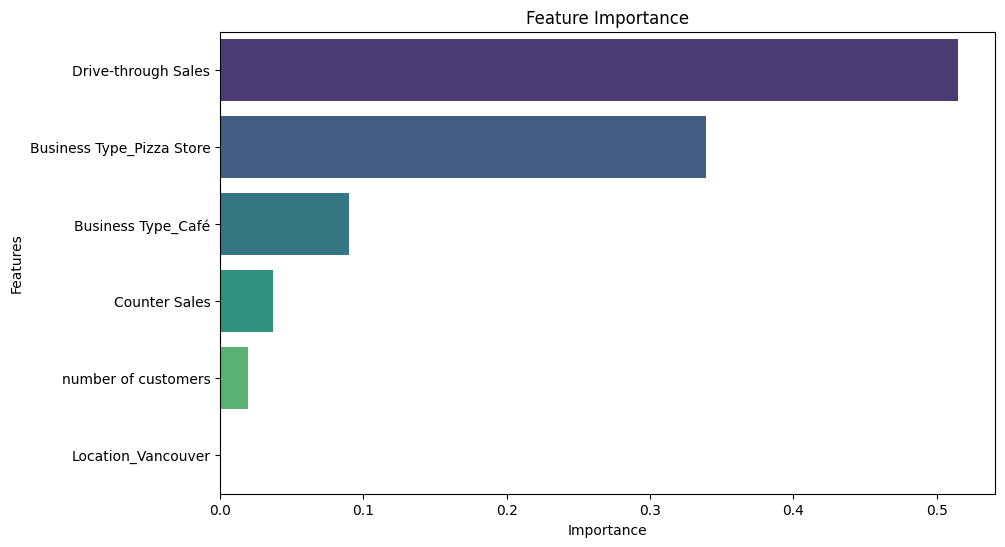

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[indices], y=features[indices], palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
#visualising the Decision tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

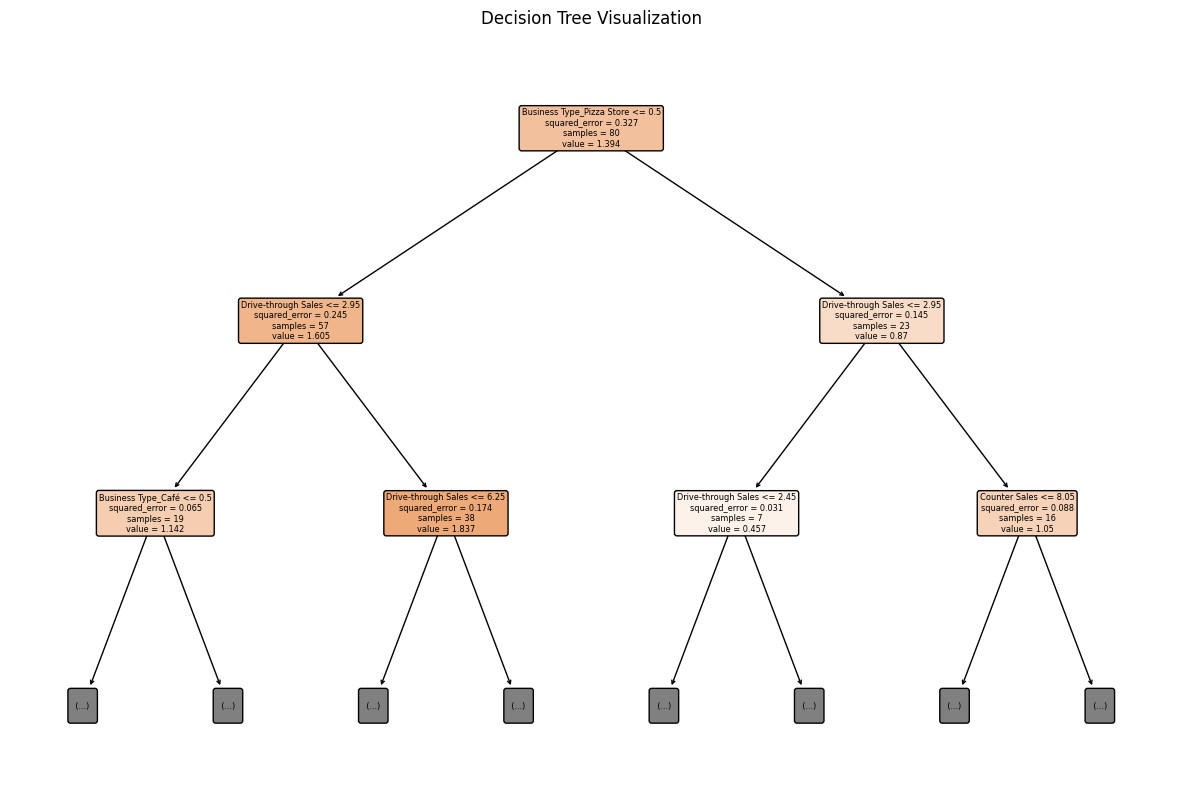

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=2)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf= rf_model.predict(X_test)

In [ ]:
meansqrerr_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Mean Squared Error (MSE): {meansqrerr_rf}")
print(f"R-squared (R²) score: {r2_rf}")

Mean Squared Error (MSE): 0.01179964999999993
R-squared (R²) score: 0.9662481407322656


In [ ]:
#Visualizing feature importance in random forest
importance = rf_model.feature_importances_
features = X.columns
indices_rf = np.argsort(importance)[::-1]

<ipython-input-45-88d1cd10645b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices_rf], y=features[indices_rf], palette="rainbow")


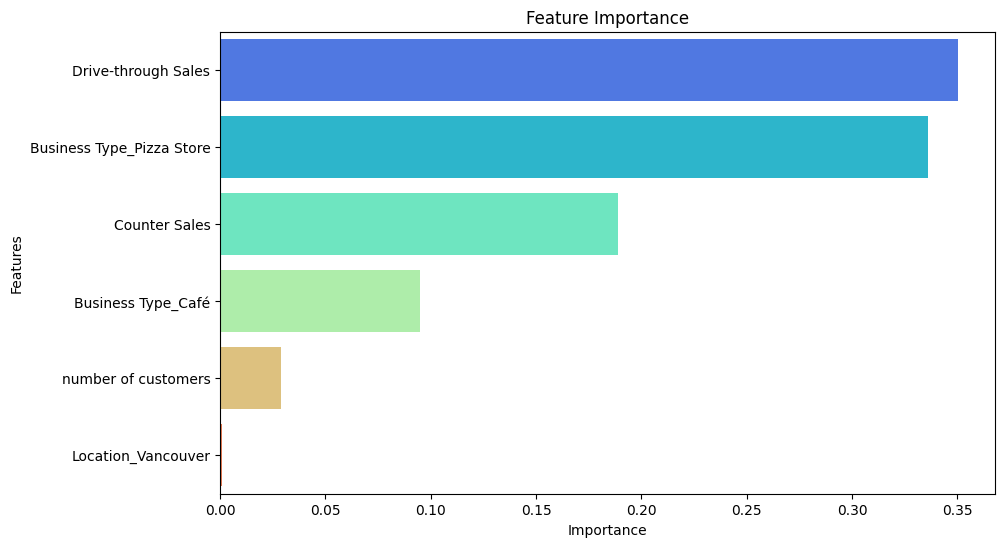

In [ ]:
#Plotting the features in Random forest
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[indices_rf], y=features[indices_rf], palette="rainbow")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [ ]:
estimators = [10,50,100,200]
mse_scores = []

In [ ]:
for n_estimators in estimators:

    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state= 42)

    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    mse_scores.append(mse)

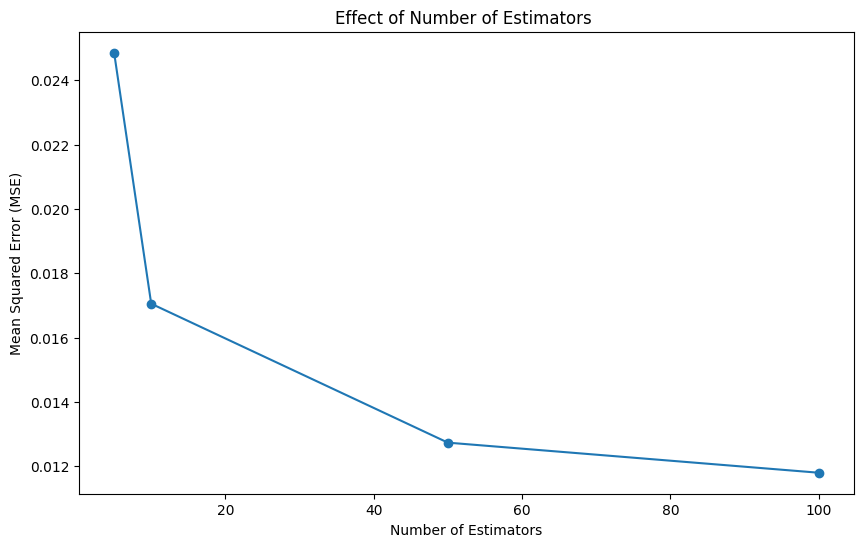

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(estimators, mse_scores, marker='o')
plt.title('Effect of Number of Estimators ')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=24)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=24)

In [ ]:
importance_rf = rf_model.feature_importances_
features = X.columns
indices_rf = np.argsort(importance_rf)[::-1]

<ipython-input-90-c93381d0984e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_rf[indices_rf], y=features[indices_rf], palette='colorblind')


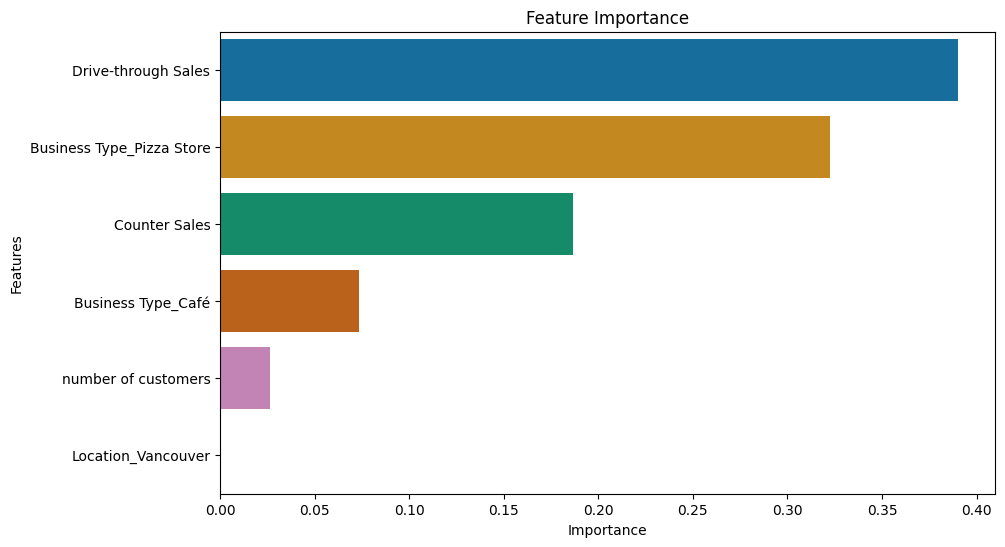

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_rf[indices_rf], y=features[indices_rf], palette='colorblind')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
input_data =pd.DataFrame({
    'Counter Sales':[500000],
    'Drive-through Sales':[700000],
    'number of customers': [0],
    'Business Type_Pizza Store': [1],
    'Business Type_Café': [0],
    'Location_Richmond': [1],
    'Location_Vancouver': [0]

})

In [ ]:
for col in X.columns:
    if col not in input_data.columns:
        input_data[col] = 0

In [ ]:
missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0

In [ ]:
input_data = input_data[X.columns]

In [ ]:
dt_forecast = dt_model.predict(input_data)[0]

In [ ]:
rf_forecast = rf_model.predict(input_data)[0]

In [ ]:
print(f"Decision Tree forecasted net profit: {dt_forecast} ")
print(f"Random Forest forecasted net profit: {rf_forecast} ")


Decision Tree forecasted net profit: 1.4 
Random Forest forecasted net profit: 1.3420000000000005 
